# import the **libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the **Data**

In [3]:
df = pd.read_csv('/content/titanic.csv')

In [4]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.shape

(891, 15)

# We will start with the **analysis**

In [7]:
df.survived.value_counts() , df.alive.value_counts()

(survived
 0    549
 1    342
 Name: count, dtype: int64,
 alive
 no     549
 yes    342
 Name: count, dtype: int64)

# So they arer the same, meaning we've got ot drop  'alive' feature

In [8]:
df.drop('alive',axis = 1 , inplace=True)

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


# We see that 'age' feature contains lot of **missing values**

# Depending on the following analysis we will fill in the missing values

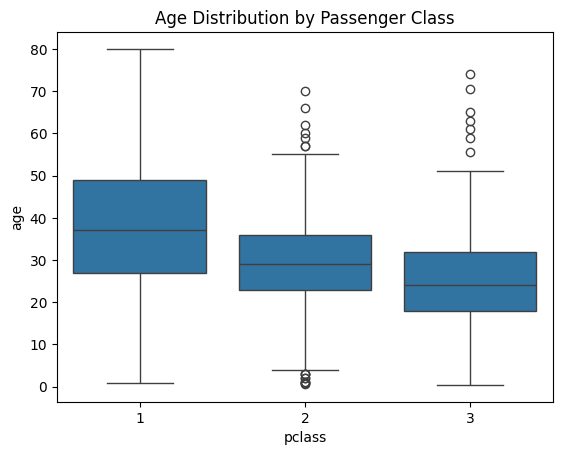

In [11]:
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

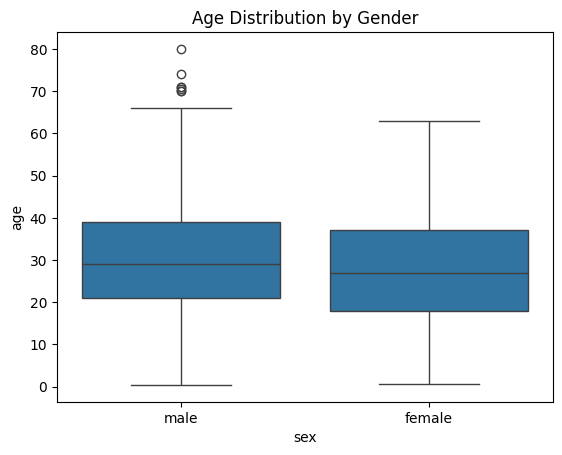

In [12]:
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

In [13]:
df.groupby(['pclass', 'sex', 'alone'])['age'].median()

pclass  sex     alone
1       female  False    35.00
                True     32.50
        male    False    37.00
                True     45.00
2       female  False    25.50
                True     32.25
        male    False    29.00
                True     30.00
3       female  False    19.50
                True     22.00
        male    False    17.50
                True     27.00
Name: age, dtype: float64

In [14]:
df['age'] = df.groupby(['pclass', 'sex', 'alone'])['age'].transform('median')

# We filled the ***age*** missing values in each subset *'pclass', 'sex', 'alone'* with **median** by using **groupby** and **transform** methods




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


# We see that deck feature has a lot of null values so we've got ot drop it too.

In [16]:
df.drop('deck' , axis = 1 , inplace = True)

# **Let** us see if the class had an impact of the survived people

In [17]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

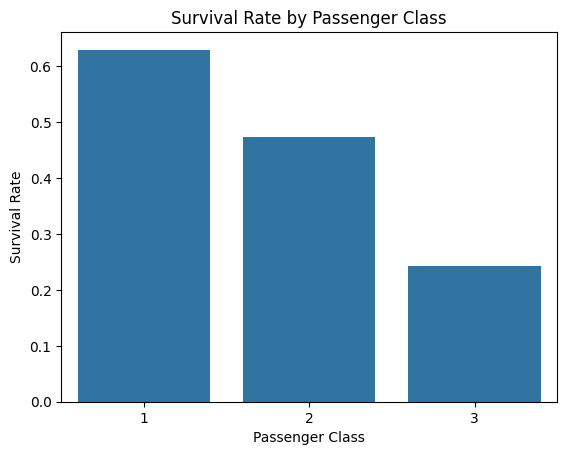

In [18]:
survival_rate_by_class = df.groupby('pclass')['survived'].mean()
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# We can see that class 1 has a great chance to survive




# has the **gender** impact too ?

In [19]:
survival_rate_by_gender = df.groupby('sex')['survived'].mean()

In [20]:
survival_rate_by_gender

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

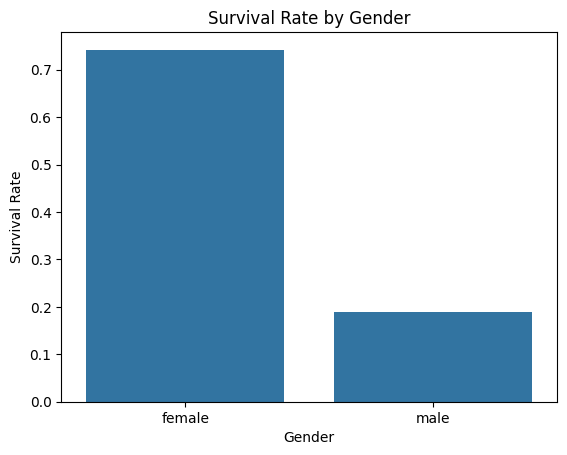

In [21]:
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

#As we can see that females had a really bigger chance


#Let us see if the age had an impact

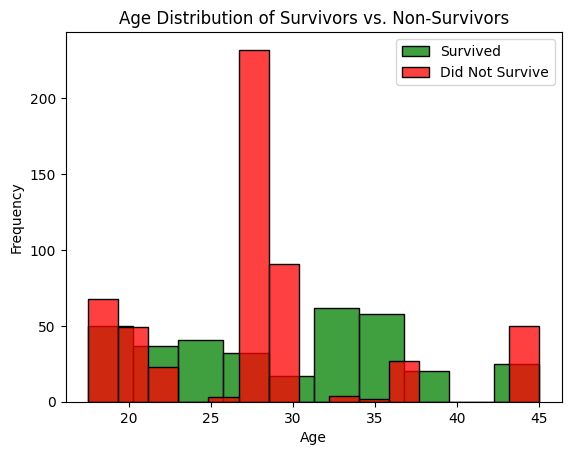

In [22]:
sns.histplot(df[df['survived'] == 1]['age'], color='green', label='Survived')
sns.histplot(df[df['survived'] == 0]['age'], color='red', label='Did Not Survive')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# if you are between 30 and 40 your chance to survive is very big

#We need now to see if the family size had an impact

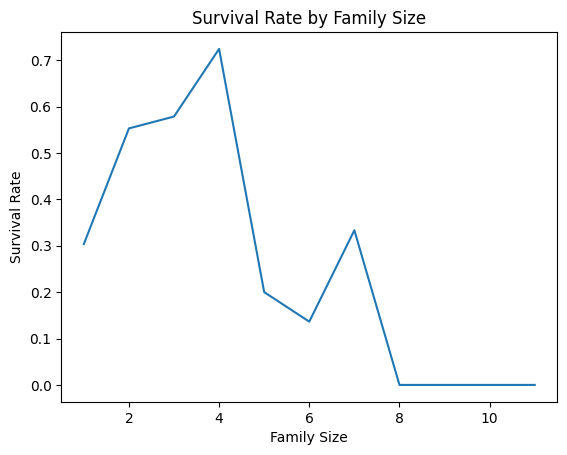

In [23]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 # The 1 is the passenger himself
survival_rate_by_family_size = df.groupby('family_size')['survived'].mean()
sns.lineplot(x=survival_rate_by_family_size.index, y=survival_rate_by_family_size.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Exciting insights! the family size had a bag impact you can say

# Let us see the correlation between the features

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alone        891 non-null    bool   
 13  family_size  891 non-null    int64  
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.4+ KB


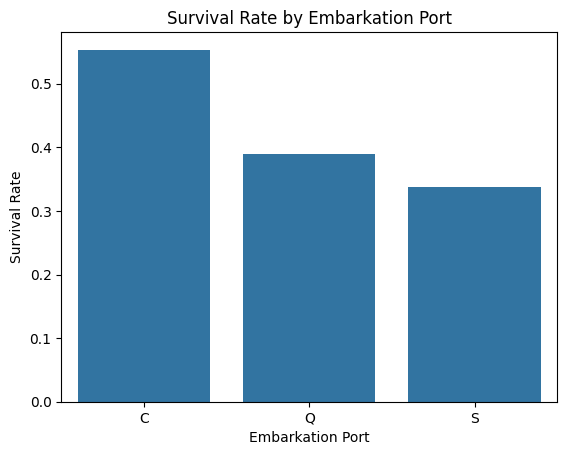

In [27]:
survival_rate_by_embarked = df.groupby('embarked')['survived'].mean()
sns.barplot(x=survival_rate_by_embarked.index, y=survival_rate_by_embarked.values)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

# We can see that C park is the most likely to survive

# See the correlation between features

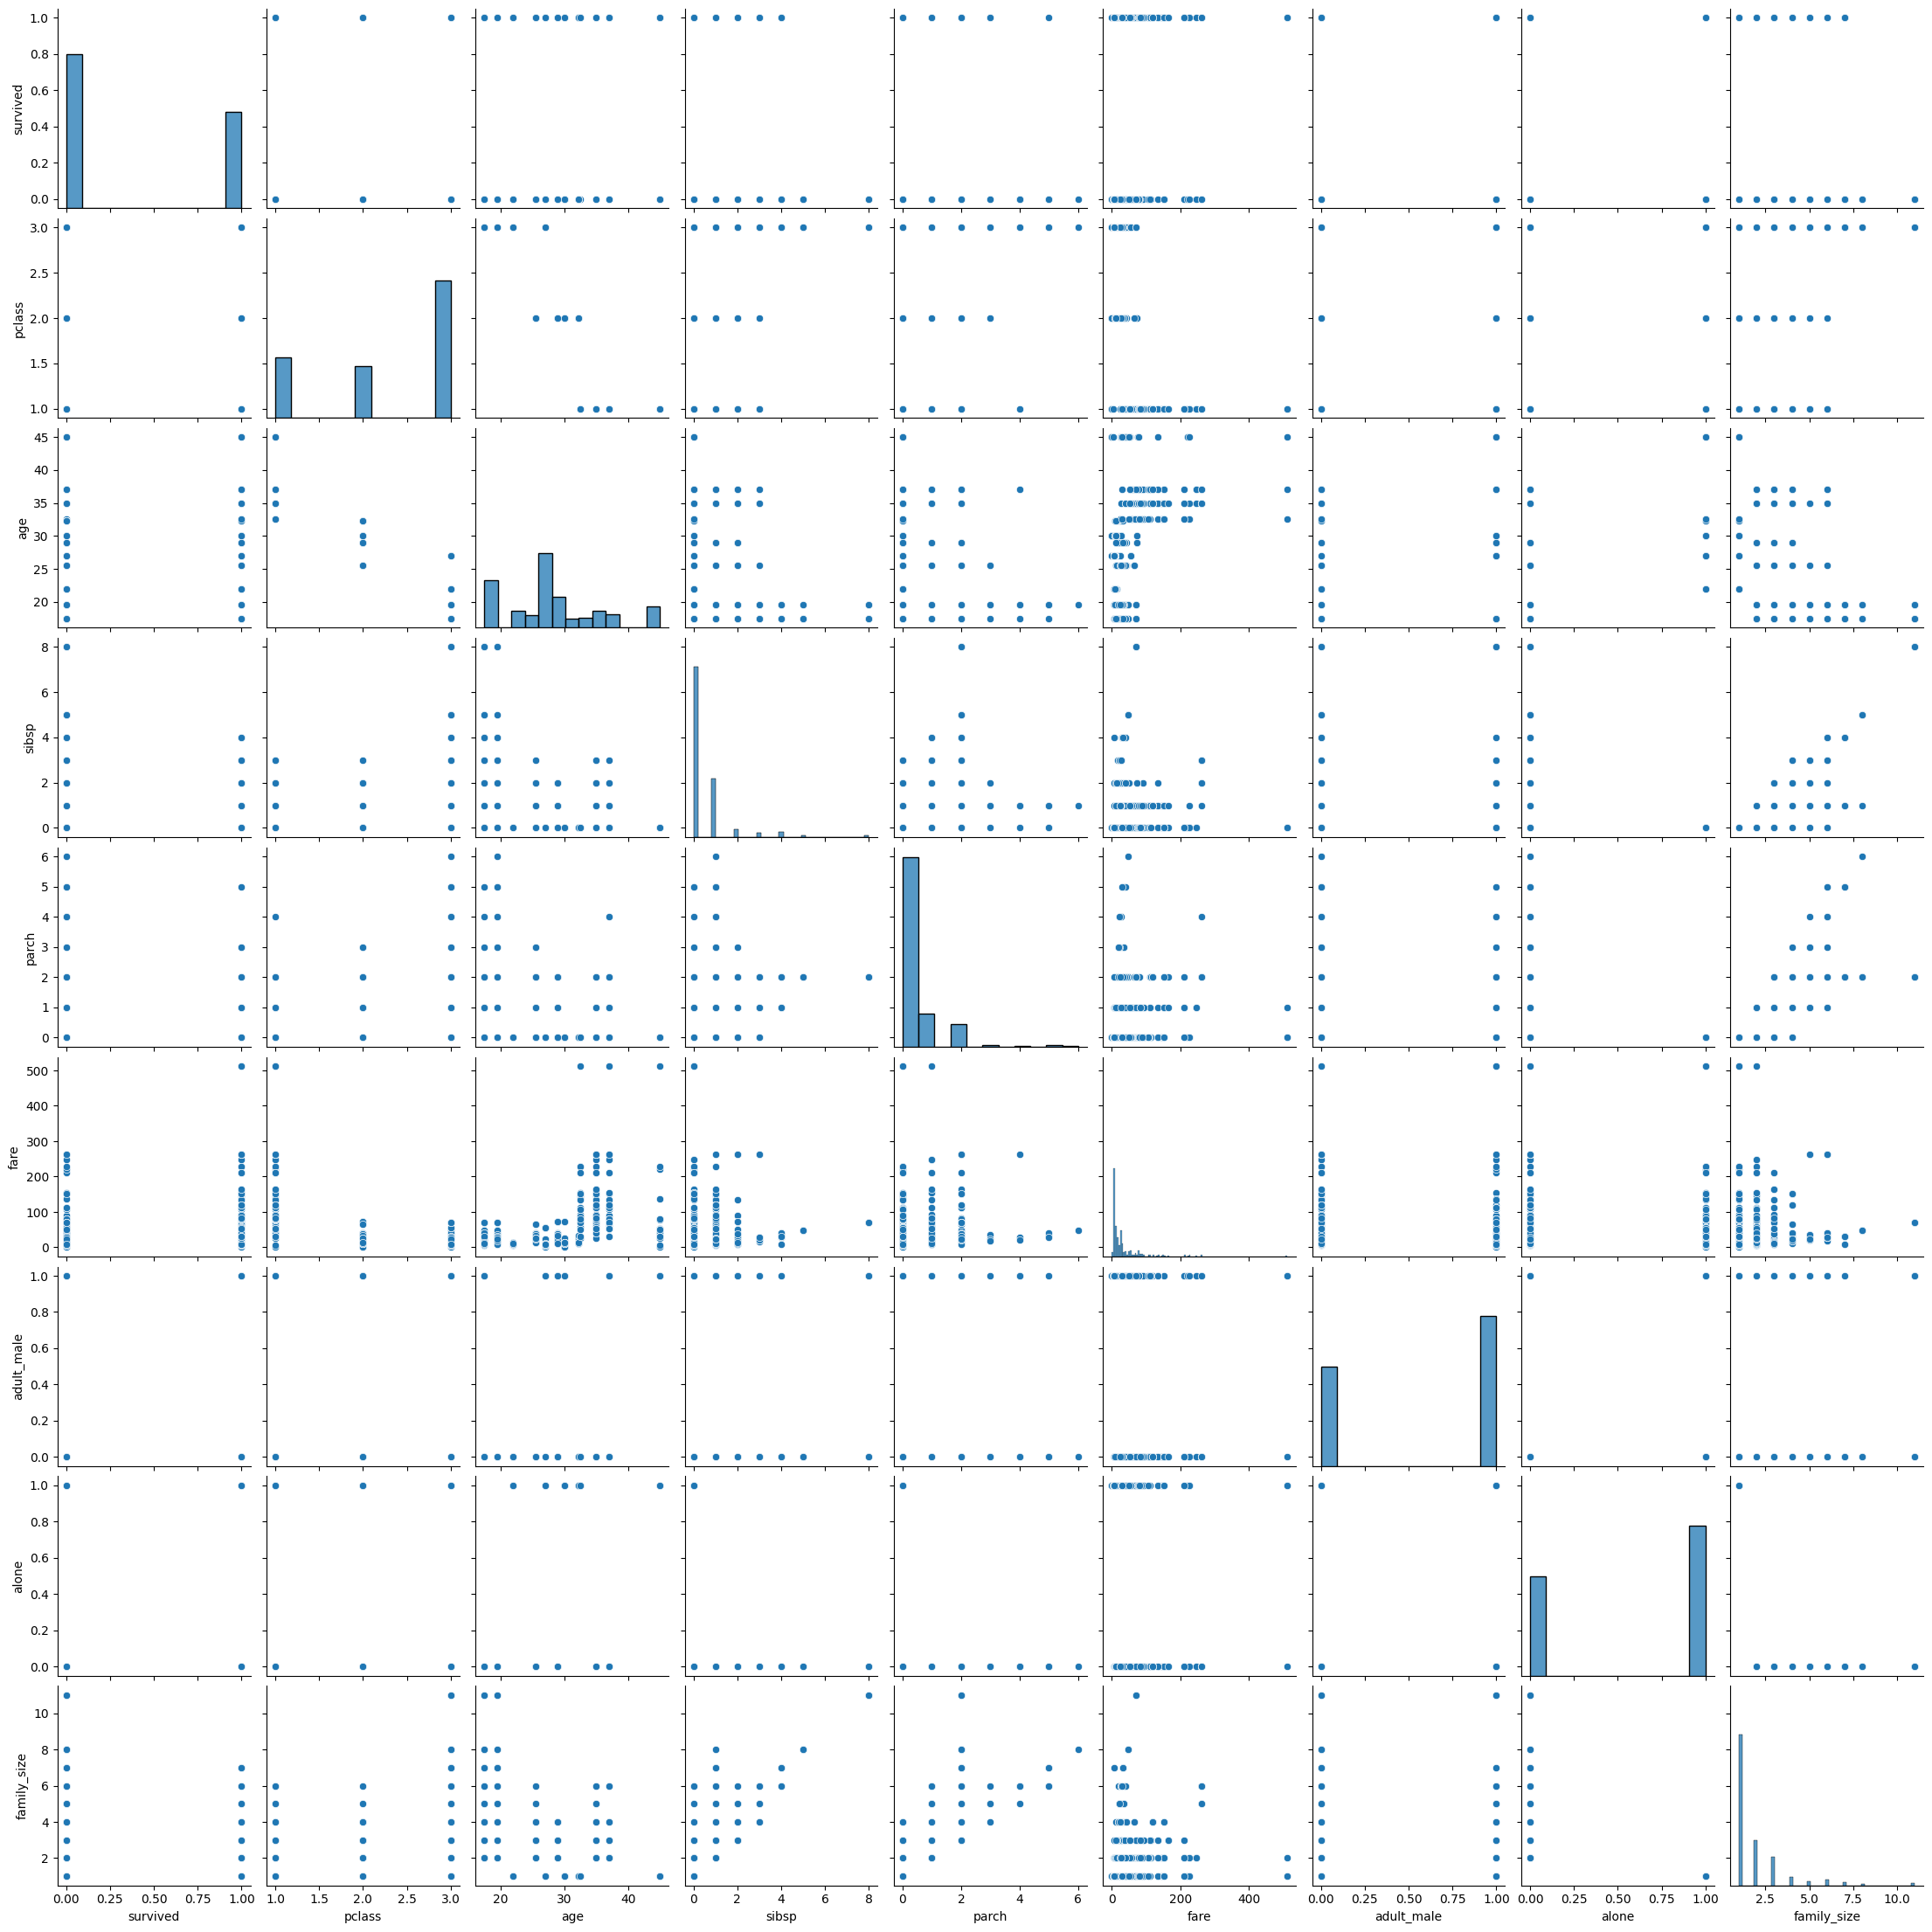

In [29]:
sns.pairplot(df)